# Compute and Plot Details for Evaluation



In [1]:
import pandas as pd


### Read file, put file in data frame

In [2]:
# Path to Excel file
file_path = "evaluation.xlsx"

# Load a specific sheet by name
sheet_name = "1-18099"  #First sheet in xlsx
data = pd.read_excel(file_path, sheet_name=sheet_name)

First test, compute score for one leaflet

In [3]:
# Compute the score based on the 'Bewertung' column
score = data['Result'].mean()

# Output the score
print("Total Score:", score)

Total Score: 0.9166666666666666


Test to compute score per category for the first leaflet

In [4]:
category_scores = data.groupby('QuestionsetCategory')['Result'].mean()

# Output the scores for each category
print("Scores by Questionset Category:")
print(category_scores)

Scores by Questionset Category:
QuestionsetCategory
ICW      0.500000
MK       0.923077
MPD      1.000000
ORG      1.000000
UNDES    1.000000
Name: Result, dtype: float64


## Compute and Print: 
* Total score for each leaflet
* Score per category for each leaflet
* Score per field_name over all leaflets
* Score per Category over all leaflets

Wird für Tabellengenerierung benötigt!

In [5]:
excel_data = pd.ExcelFile(file_path)
sheet_scores = {}

# Dictionary to accumulate scores for each "QuestionsetCategory" across all sheets
overall_category_scores = {}
# Dictionary to accumulate scores for each "FieldName" across all sheets
overall_fieldname_scores = {}

for sheet_name in excel_data.sheet_names:
    if sheet_name.startswith("1"):
        # if sheet_name == "135968":
        #     continue
        # Load the specific sheet
        data = excel_data.parse(sheet_name)
        
        # Compute the total score for the 'Rating' column
        total_score = data['Result'].mean()
        
        # Compute the score for each 'Kategorie'
        category_scores = data.groupby('QuestionsetCategory')['Result'].mean()

        # Compute the score for each 'Kategorie'
        fieldname_scores = data.groupby('FieldName')['Result'].mean()
        
        # Store the scores in a dictionary
        sheet_scores[sheet_name] = {
            "Total Score": total_score,
            "Category Scores": category_scores.to_dict(),
            "Field Name Scores": fieldname_scores.to_dict()
        }

        # Accumulate the scores for each "Kategorie" over all sheets
        for category, score in category_scores.items():
            if category not in overall_category_scores:
                overall_category_scores[category] = []
            overall_category_scores[category].append(score)

        
        # Accumulate the scores for each "Field Name" over all sheets
        for fieldname, score in fieldname_scores.items():
            if fieldname not in overall_fieldname_scores:
                overall_fieldname_scores[fieldname] = []
            overall_fieldname_scores[fieldname].append(score)

# Compute the overall mean score for each "Kategorie"
final_overall_category_scores = {
    category: sum(scores) / len(scores)
    for category, scores in overall_category_scores.items()
}

# Compute the overall mean score for each "Kategorie"
final_overall_fieldname_scores = {
    fieldname: sum(scores) / len(scores)
    for fieldname, scores in overall_fieldname_scores.items()
}


# Output the scores for each relevant sheet
for sheet, scores in sheet_scores.items():
    print(f"Scores for {sheet}:")
    print(f"  Total Score: {scores['Total Score']}")
    print(f"  Category Scores:")
    for category, score in scores['Category Scores'].items():
        print(f"    {category}: {score:.4f}")
    print("____________________________________________________________________")

# Output the overall scores per "QuestionsetCategory"
print("=========================================================================")
print("Overall Scores per QuestionsetCategory across all sheets:")
for category, score in final_overall_category_scores.items():
    print(f"  {category}: {score:.4f}")
print("____________________________________________________________________")

print("Overall Scores per Field Name across all sheets:") 
for fieldname, score in final_overall_fieldname_scores.items():
    if score < 1:                                                                      
        print(f"  {fieldname}: {score:.4f}")
print("____________________________________________________________________")

Scores for 1-18099:
  Total Score: 0.9166666666666666
  Category Scores:
    ICW: 0.5000
    MK: 0.9231
    MPD: 1.0000
    ORG: 1.0000
    UNDES: 1.0000
____________________________________________________________________
Scores for 1-19671:
  Total Score: 0.9444444444444444
  Category Scores:
    ICW: 0.7500
    MK: 1.0000
    MPD: 0.9091
    ORG: 1.0000
    UNDES: 1.0000
____________________________________________________________________
Scores for 1-24507:
  Total Score: 0.9444444444444444
  Category Scores:
    ICW: 1.0000
    MK: 0.9231
    MPD: 0.9091
    ORG: 1.0000
    UNDES: 1.0000
____________________________________________________________________
Scores for 1-28622:
  Total Score: 0.75
  Category Scores:
    ICW: 0.5000
    MK: 0.8462
    MPD: 0.6364
    ORG: 1.0000
    UNDES: 0.0000
____________________________________________________________________
Scores for 1-31947:
  Total Score: 0.7777777777777778
  Category Scores:
    ICW: 0.2500
    MK: 0.6923
    MPD: 1.0000
  

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the Excel file 

file_path = "evaluation.xlsx"
excel_data = pd.ExcelFile(file_path)

# Initialize a DataFrame to store all sheets data
all_data = pd.DataFrame()

# Concatenate data from all relevant sheets
for sheet_name in excel_data.sheet_names:
    if sheet_name.startswith("1"):  # Only process sheets starting with "1"
        data = excel_data.parse(sheet_name)
        all_data = pd.concat([all_data, data], ignore_index=True)

# Check if 'ErrorCode' is present for each 'FieldName'
if 'FieldName' in all_data.columns and 'ErrorCode' in all_data.columns:
    # Filter rows where 'Fehlercode' is not null
    filtered_data = all_data[~all_data['ErrorCode'].isna()]
    
    # Group by 'Field Name' and 'Fehlercode', then reset the index for Seaborn compatibility
    grouped_data = filtered_data.groupby(['FieldName', 'ErrorCode']).size().reset_index(name='Count')


In [ ]:
!poetry add seaborn

In [7]:
# # Count occurrences of each Fehlercode
error_counts = filtered_data['ErrorCode'].value_counts().reset_index()
error_counts.columns = ['ErrorCode', 'Count']

# # Group by 'FieldName' and 'ErrorCode', count occurrences, and normalize to proportions
proportions = (
    filtered_data.groupby(['FieldName', 'ErrorCode']).size()
    .groupby(level=0).apply(lambda x: x / x.sum())
    .unstack(fill_value=0)
)

# # Ensure 'Field Name' is a clean column, not part of multi-index
proportions.index = proportions.index.get_level_values(0)

# # Round proportions to 2 decimals
proportions = proportions.round(2)

# # Print proportions
proportions

ErrorCode,A,F,I,M
FieldName,,,,
additional_instruction,0.33,0.0,0.0,0.67
admission_nr,0.00,0.0,1.0,0.00
dose_and_rate,0.00,0.0,1.0,0.00
doseform,0.00,1.0,0.0,0.00
dosing_instruction,0.00,0.0,0.0,1.00
fullname,0.00,0.0,1.0,0.00
interactions_medications,0.14,0.0,0.0,0.86
max_dose_per_intake,0.00,0.5,0.5,0.00
mode_of_action,0.00,0.0,0.0,1.00


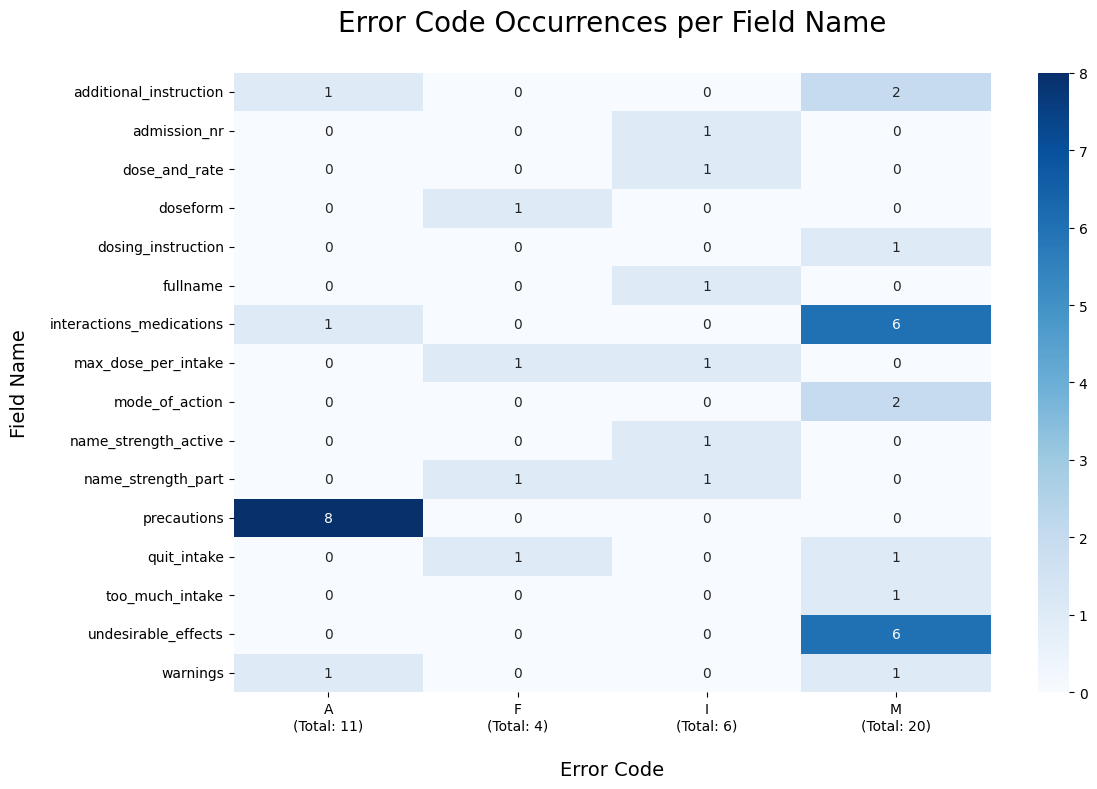

In [8]:
#Code for Heatmap plot

import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Create a pivot table for error occurrences
error_heatmap_data = filtered_data.groupby(['FieldName', 'ErrorCode']).size().unstack(fill_value=0)

# Calculate total occurrences for each error code
error_code_totals = error_heatmap_data.sum()

# Append totals to x-axis labels
x_labels_with_totals = [f"{code}\n(Total: {total})" for code, total in zip(error_code_totals.index, error_code_totals.values)]

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(error_heatmap_data, annot=True, fmt='d', cmap='Blues', cbar=True)

# Set custom ticks for x-axis
plt.title('Error Code Occurrences per Field Name', fontsize=20, pad = 30)
plt.xlabel('Error Code', fontsize=14, labelpad=20)  # Increased padding for x-axis
plt.ylabel('Field Name', fontsize=14, labelpad=15)  # Increased padding for y-axis

# Adjust x-axis ticks to be at the center of each column
plt.xticks(
    ticks=np.arange(len(x_labels_with_totals)) + 0.5,  # Position ticks at column centers
    labels=x_labels_with_totals,
    fontsize=10,
    ha='center'
)

plt.tight_layout()
plt.savefig("error_code_heatmap.svg", format="svg")  # Save as SVG
plt.savefig("error_code_heatmap.jpg", format="jpg", dpi=300)  # Save as JPG
plt.show()

